# What is "sanitization" of molecules?

``From RDKit website: https://www.rdkit.org/docs/RDKit_Book.html
The molecule parsing functions all, by default, perform a “sanitization” operation on the molecules read``

CTAB = connection table file (V2000 or V3000) form (Chapter 2 , http://c4.cabrillo.edu/404/ctfile.pdf)

### Ref:  https://www.rdkit.org/docs/RDKit_Book.html#molecular-sanitization

| Module | Process |
| --- | --- |
| `clearComputedProps` | Removes any computed properties that already exist |
| `cleanUp` | Standardizes a small number of non-standard valence states |
| `updatePropertyCache` | calculates the explicit and implicit valences on all atoms |
| `symmetrizeSSSR` | Symmetrized smallest set of smallest rings algorithm ( |
| `Kekulize` | converts aromatic rings to their Kekule form |
| `assignRadicals` | converts aromatic rings to their Kekule form |
| `setAromaticity` | identifies the aromatic rings and ring systems  |
| `setConjugation` | dentifies which bonds are conjugated |
| `setHybridization` | calculates the hybridization state of each atom |
| `cleanupChirality` | removes chiral tags from atoms that are not sp3 hybridized |


In [1]:
!which python

/home/mandar/anaconda3/envs/my-rdkit-env_py37/bin/python


In [19]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem

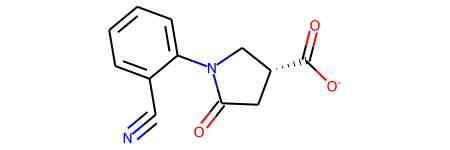

In [20]:
## example from UGM2012 tutorial folder

m1 = Chem.MolFromSmiles('N#Cc1ccccc1N1C[C@H](C(=O)[O-])CC1=O',sanitize=False)
m1.UpdatePropertyCache() ## See table above to understand what it is doing!!
m1


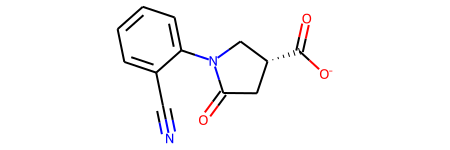

In [21]:
## Let's see what `sanitize=True` gives
m2 = Chem.MolFromSmiles('N#Cc1ccccc1N1C[C@H](C(=O)[O-])CC1=O',sanitize=True)
m2.UpdatePropertyCache()
m2

In [22]:
## Same effect can be achieved with
s1 = Chem.MolToSmiles(m1)
s2 = Chem.MolToSmiles(m2)
s1, s2

('N#Cc1ccccc1N1C[C@H](C(=O)[O-])CC1=O', 'N#Cc1ccccc1N1C[C@H](C(=O)[O-])CC1=O')

In [28]:
## comparing these two smiles 
## based on iwatbiopen's blog here:   
## https://iwatobipen.wordpress.com/2020/08/24/difference-between-santize-mol-and-not-sanitize-mol-memo-rdkit/
## both the SMILES are same!!

mols = [m1, m2 ]

for m in mols:
    print(Chem.MolToSmiles(m))
    
fps = [Chem.PatternFingerprint(m) for m in mols]
print('#####################')

for fp in fps:
    print(DataStructs.TanimotoSimilarity(fp, fps[0])) ## comparing with first fingerprint, 0-indexed entries!!!

N#Cc1ccccc1N1C[C@H](C(=O)[O-])CC1=O
N#Cc1ccccc1N1C[C@H](C(=O)[O-])CC1=O
#####################
1.0
1.0


In [29]:
## both are the same SMILES!! 

# Substructure Check 
## Chem.FastFindRings(m)
### see image below for SMARTS reference (RDkit-website)

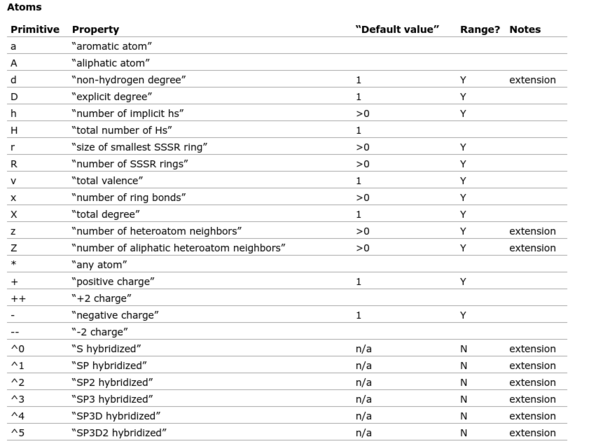

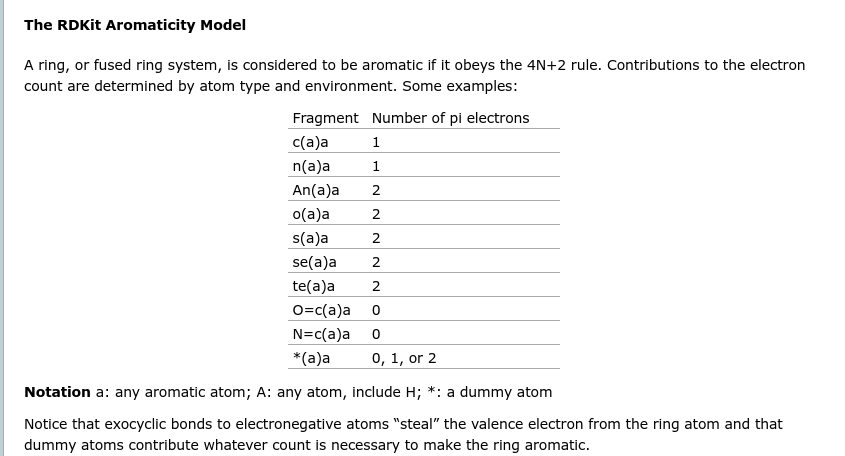

In [30]:
Chem.FastFindRings(m)
m.HasSubstructMatch(Chem.MolFromSmarts('[r]'))

True

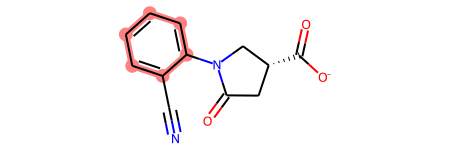

In [31]:
tmp=m.GetSubstructMatch(Chem.MolFromSmarts('c1ccccc1'))
m

In [42]:
[list(x) for x in m.GetSubstructMatches(Chem.MolFromSmarts('[a;r]'))] # aromatic atoms

[[2], [3], [4], [5], [6], [7]]

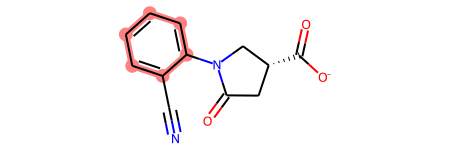

In [43]:
m

In [44]:
[list(x) for x in m.GetSubstructMatches(Chem.MolFromSmarts('[A;r]'))] # A = aliphatic ring

[[8], [9], [10], [14], [15]]

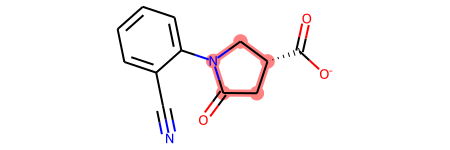

In [45]:
m

# Second example

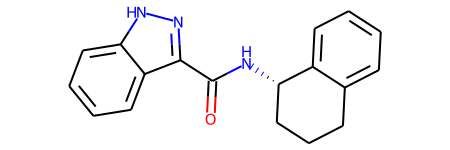

In [47]:
sm = Chem.MolFromSmiles('O=C(N[C@H]1CCCc2ccccc21)c1n[nH]c2ccccc21') ## Here Full sanitization is done by default
sm

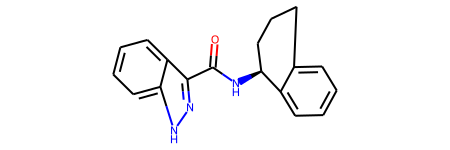

In [48]:
### Partial Sanitization!!
m = Chem.MolFromSmiles('O=C(N[C@H]1CCCc2ccccc21)c1n[nH]c2ccccc21',sanitize=False)
m.UpdatePropertyCache()
Chem.SetHybridization(m)
Chem.FastFindRings(m)
m

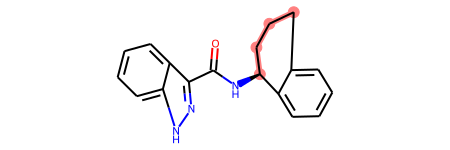

In [50]:
[list(x) for x in m.GetSubstructMatches(Chem.MolFromSmarts('[A;r]'))]
m

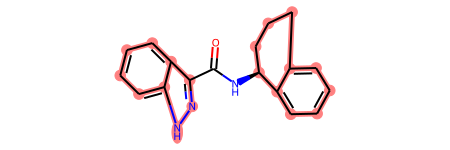

In [55]:
[list(x) for x in m.GetSubstructMatches(Chem.MolFromSmarts('[r]'))]
m

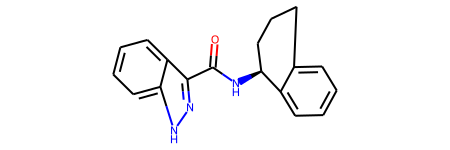

In [59]:
## THis command gives wrong answer!!! Answer should be 1 but it's  not!!

[list(x) for x in m.GetSubstructMatches(Chem.MolFromSmarts('[r5]'))] ## 5-membered SSSR
m

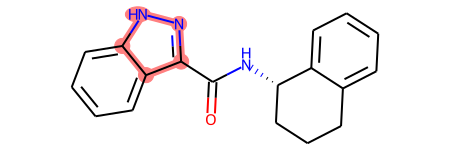

In [61]:
### What if we use completely sanitized molecule --> changing m to sm here
## See the difference!!

[list(x) for x in sm.GetSubstructMatches(Chem.MolFromSmarts('[r5]'))] ## 5-membered SSSR
sm

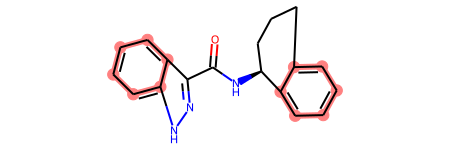

In [73]:
### Checking with m
[list(x) for x in m.GetSubstructMatches(Chem.MolFromSmarts('[R2]'))]
m

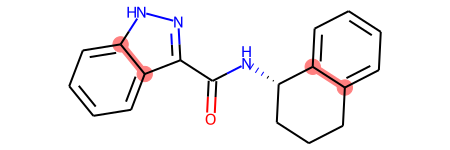

In [74]:
### Checking with sm
[list(x) for x in sm.GetSubstructMatches(Chem.MolFromSmarts('[R2]'))]
sm

# Symmetry issue!!

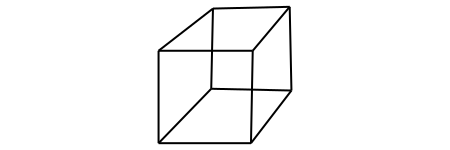

In [75]:
mb="""
  Mrv0541 09231207052D          

  8 12  0  0  0  0            999 V2000
    0.4714    0.2946    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4420   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7679    0.3241    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7973   -1.0902    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4479   -0.4184    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1432   -0.4184    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1137   -1.9800    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4479   -1.9800    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1  3  1  0  0  0  0
  3  4  1  0  0  0  0
  4  2  1  0  0  0  0
  1  5  1  0  0  0  0
  5  6  1  0  0  0  0
  6  3  1  0  0  0  0
  6  7  1  0  0  0  0
  7  4  1  0  0  0  0
  5  8  1  0  0  0  0
  8  7  1  0  0  0  0
  8  2  1  0  0  0  0
M  END
"""
m = Chem.MolFromMolBlock(mb)
m

In [76]:
mb2 = Chem.MolFromMolBlock(mb,sanitize=False)
mb2.UpdatePropertyCache()
Chem.GetSSSR(mb2)
mb2.GetRingInfo().NumRings()

5

In [78]:
m.GetRingInfo().NumRings() ## so sanitize molecules give correct number of rings

6

In [79]:
## if partially sanitized use this
Chem.GetSymmSSSR(mb2)
mb2.GetRingInfo().NumRings()

6

# Stereochemistry

In [80]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

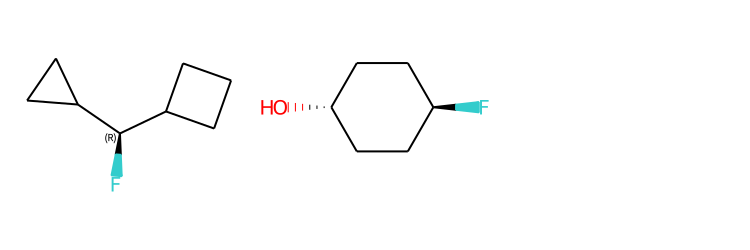

In [81]:
# Default Representation uses legacy FindMolChiralCenters() code
m1 = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
m2 = Chem.MolFromSmiles('F[C@H]1CC[C@H](O)CC1')
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

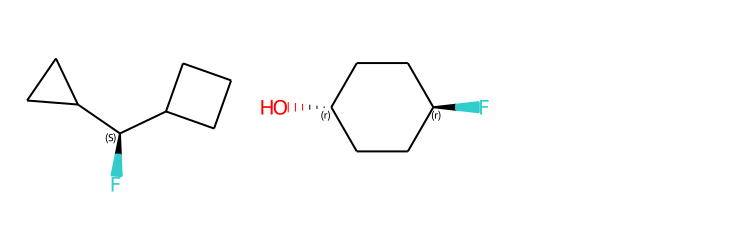

In [83]:
from rdkit.Chem import rdCIPLabeler
rdCIPLabeler.AssignCIPLabels(m1)
rdCIPLabeler.AssignCIPLabels(m2)
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

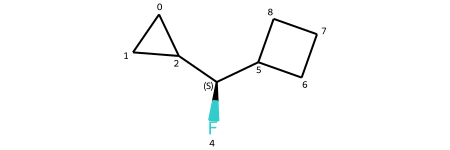

In [93]:
# Iterate over the atoms
for atom in m1.GetAtoms():
    # For each atom, set the property "atomNote" to a index+1 of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()))
    
m1

In [94]:
m1.GetAtomWithIdx(3).GetProp('_CIPCode') ## zero-indexed atom

'S'